EVI data statistics
 Average: (0.233 +/- 0.010)
 Variance: (0.017; 0.019; 0.021)
 Standard deviation: (0.130; 0.137; 0.146)
 Median : (0.189)
 Truncated mean: (0.224)

LAI data statistics
 Average: (1.132 +/- 0.090)
 Variance: (1.375; 1.548; 1.756)
 Standard deviation: (1.173; 1.244; 1.325)
 Median : (0.650)
 Truncated mean: (0.953)

Temperature 2 m data statistics
 Average: (2.165 +/- 0.843)
 Variance: (120.312; 135.445; 153.639)
 Standard deviation: (10.969; 11.638; 12.395)
 Median : (2.846)
 Truncated mean: (2.499)

Total precipitation data statistics
 Average: (75.063 +/- 3.760)
 Variance: (2394.651; 2695.841; 3057.971)
 Standard deviation: (48.935; 51.921; 55.299)
 Median : (62.488)
 Truncated mean: (68.388)



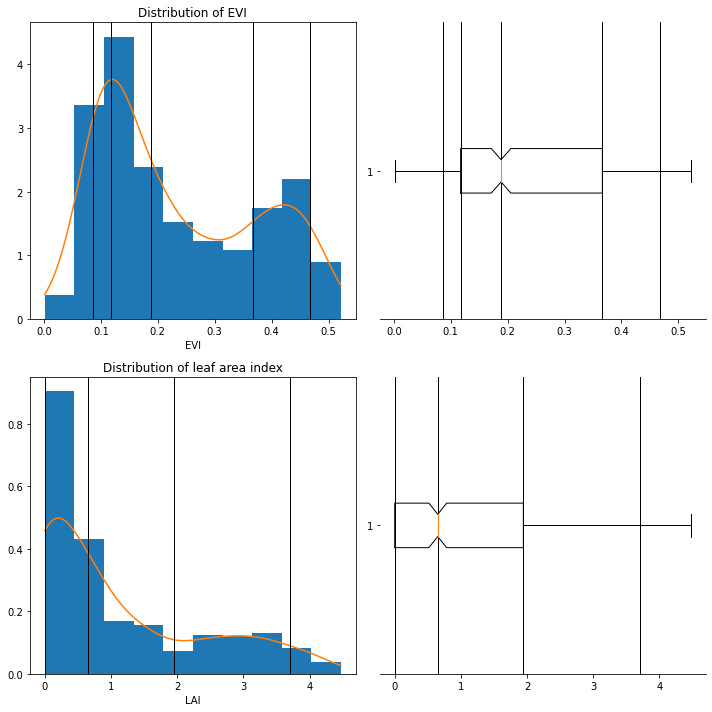

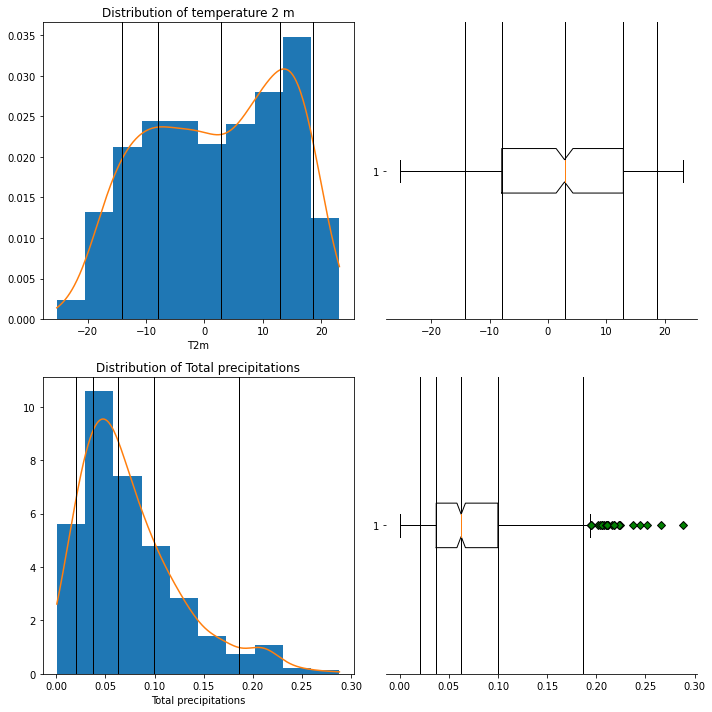

In [78]:
from pandas.core.groupby.groupby import F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import math 
from sklearn.mixture import GaussianMixture
import seaborn as sns

def KDE(F):
  kernel = scipy.stats.gaussian_kde(F)
  min, max = F.min(), F.max()
  x = np.linspace(min, max, len(data))
  kde_values = kernel(x)
  return x , kde_values

def mad(df):
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()
    
    return k * np.median(np.fabs(df - median))

def GetParams(F):
    mean = F.mean()
    variance = F.var()
    std =  F.std()
    median = F.median()
    trimmed_mean = scipy.stats.trim_mean(F, proportiontocut=0.1)
    mad_value = mad(F)

    norm_q95 = scipy.stats.norm.ppf(0.95)
    mean_conf = norm_q95 * std / np.sqrt(len(data))

    chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df = len(data)-1)
    chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df = len(data)-1)

    var_conf_left = variance * (len(data) - 1) / chi2_q95_left
    var_conf_right = variance * (len(data) - 1) / chi2_q95_right
    std_conf_left = np.sqrt(var_conf_left)
    std_conf_right = np.sqrt(var_conf_right)  
    para = [mean, mean_conf, variance, var_conf_left, var_conf_right, 
            std, std_conf_left, std_conf_right, median, trimmed_mean, mad_value]
    return para

def Display(N, para):
    print(f"{N} data statistics\n Average: (%0.3f +/- %0.3f)\n" % (para[0], para[1]), 
          "Variance: (%0.3f; %0.3f; %0.3f)\n" % (para[3], para[2], para[4]),
          "Standard deviation: (%0.3f; %0.3f; %0.3f)\n" % (para[6], para[5], para[7]),
          "Median : (%0.3f)\n"%(para[8]), "Truncated mean: (%0.3f)\n"%(para[9]))  

data = pd.read_csv('/content/drive/MyDrive/Maltivariate/Input_Kourovka.dat', delimiter = '|', header = 0,
                   index_col = False, infer_datetime_format=True)

EVI, LAI, T2M, TP = GetParams(data['EVI']),GetParams(data['LAI']), GetParams(data['T2m']), GetParams(data['Total prec']*1000)
    
Display('EVI', EVI)
Display('LAI', LAI)
Display('Temperature 2 m', T2M)
Display('Total precipitation', TP)


fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(10,10), tight_layout = True)

green_diamond = dict(markerfacecolor='g', marker='D')
quant = data['EVI'].quantile([.1, .25, .5, .75, .95])
quant2 = data['LAI'].quantile([.1, .25, .5, .75, .95])

ax[0][0].hist(data['EVI'],density = True)
ax[0][0].plot(KDE(data['EVI'])[0],KDE(data['EVI'])[1])
ax[0][0].axvline(x=quant[0.10], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.25], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.50], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.75], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant[0.95], color = 'black', linewidth=1)
ax[0][0].set_xlabel("EVI")
ax[0][0].set_title("Distribution of EVI")

ax[0][1].boxplot(data['EVI'], vert = False, notch = True, flierprops =green_diamond)
ax[0][1].axvline(x=quant[0.10], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.25], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.50], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.75], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant[0.95], color = 'black', linewidth=1)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)

ax[1][0].hist(data['LAI'],density = True)
ax[1][0].plot(KDE(data['LAI'])[0],KDE(data['LAI'])[1])
ax[1][0].axvline(x=quant2[0.10], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.25], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.50], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.75], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant2[0.95], color = 'black', linewidth=1)
ax[1][0].set_xlabel("LAI")
ax[1][0].set_title("Distribution of leaf area index")

ax[1][1].boxplot(data['LAI'], vert = False, notch = True, flierprops =green_diamond)
ax[1][1].axvline(x=quant2[0.10], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.25], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.50], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.75], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant2[0.95], color = 'black', linewidth=1)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)

fig.show()
fig.savefig('./plot1.png')

fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(10,10),  tight_layout = True)
quant3 = data['T2m'].quantile([.1, .25, .5, .75, .95])
quant4 = data['Total prec'].quantile([.1, .25, .5, .75, .95])

ax[0][0].hist(data['T2m'],density = True)
ax[0][0].plot(KDE(data['T2m'])[0],KDE(data['T2m'])[1])
ax[0][0].axvline(x=quant3[0.10], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.25], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.50], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.75], color = 'black', linewidth=1)
ax[0][0].axvline(x=quant3[0.95], color = 'black', linewidth=1)
ax[0][0].set_xlabel("T2m")
ax[0][0].set_title("Distribution of temperature 2 m")

ax[0][1].boxplot(data['T2m'], vert = False, notch = True, flierprops =green_diamond)
ax[0][1].axvline(x=quant3[0.10], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.25], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.50], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.75], color = 'black', linewidth=1)
ax[0][1].axvline(x=quant3[0.95], color = 'black', linewidth=1)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)

ax[1][0].hist(data['Total prec'],density = True)
ax[1][0].plot(KDE(data['Total prec'])[0],KDE(data['Total prec'])[1])
ax[1][0].axvline(x=quant4[0.10], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.25], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.50], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.75], color = 'black', linewidth=1)
ax[1][0].axvline(x=quant4[0.95], color = 'black', linewidth=1)
ax[1][0].set_xlabel("Total precipitations")
ax[1][0].set_title("Distribution of Total precipitations")

ax[1][1].boxplot(data['Total prec'], vert = False, notch = True,  flierprops =green_diamond)
ax[1][1].axvline(x=quant4[0.10], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.25], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.50], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.75], color = 'black', linewidth=1)
ax[1][1].axvline(x=quant4[0.95], color = 'black', linewidth=1)
ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)

fig.show()
fig.savefig('./plot2.png')

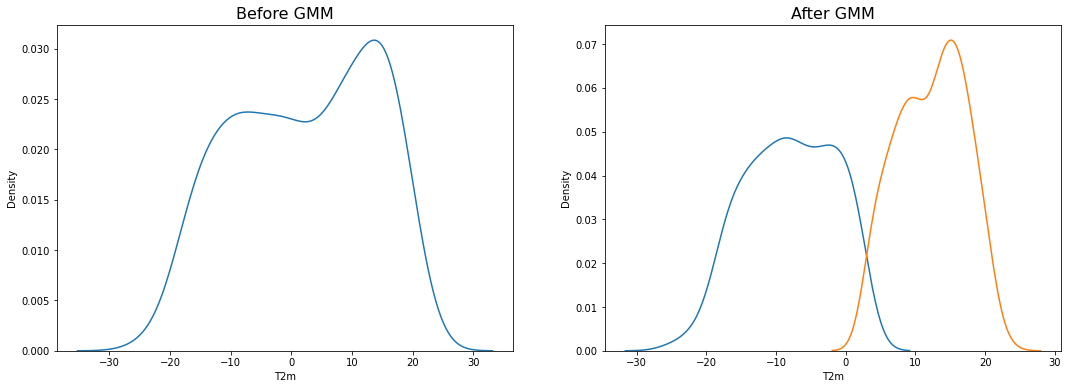

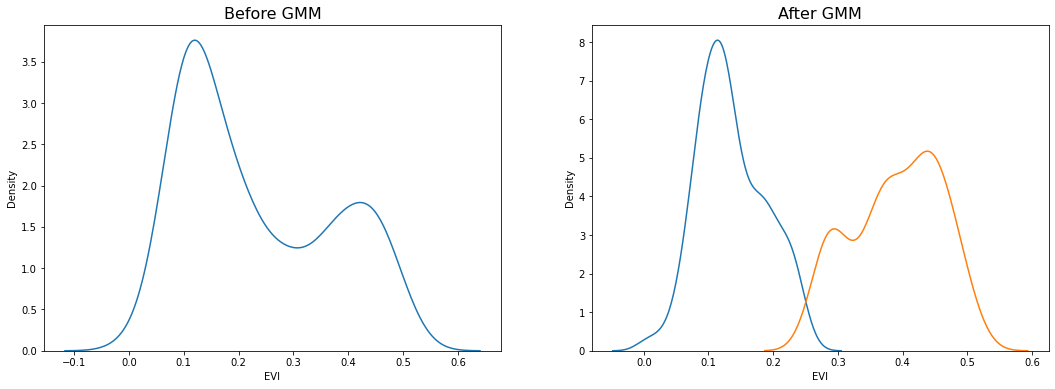

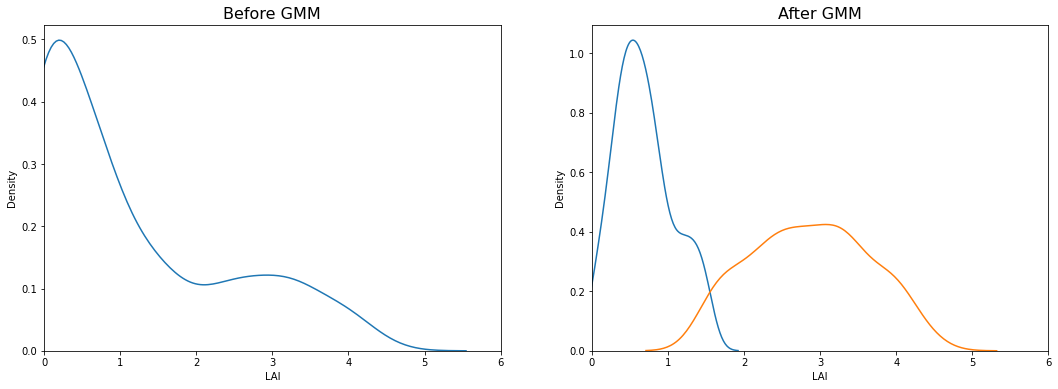

In [79]:
gmm = GaussianMixture(n_components=2, random_state=432)

gmm.fit(data['T2m'].values.reshape(-1, 1))
data['target_class_T'] = gmm.predict(data.T2m.values.reshape(-1, 1))

gmm.fit(data['EVI'].values.reshape(-1, 1))
data['target_class_EVI'] = gmm.predict(data.EVI.values.reshape(-1, 1))

gmm.fit(data['LAI'].values.reshape(-1, 1))
data['target_class_LAI'] = gmm.predict(data.LAI.values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=data['T2m'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=data[data.target_class_T==0].T2m, label='Component 1', ax=ax[1])
sns.kdeplot(data=data[data.target_class_T==1].T2m, label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()
f.savefig('./plot3.png')

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=data['EVI'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=data[data.target_class_EVI==0].EVI, label='Component 1', ax=ax[1])
sns.kdeplot(data=data[data.target_class_EVI==1].EVI, label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()
f.savefig('./plot4.png')

gmm = GaussianMixture(n_components=3, random_state=432)

gmm.fit(data['LAI'].values.reshape(-1, 1))
data['target_class_LAI'] = gmm.predict(data.LAI.values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=data['LAI'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=data[data.target_class_LAI==1].LAI, label='Component 1', ax=ax[1])
sns.kdeplot(data=data[data.target_class_LAI==2].LAI, label='Component 2', ax=ax[1])
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[1].set_title('After GMM', fontsize=16)
plt.show()
f.savefig('./plot5.png')

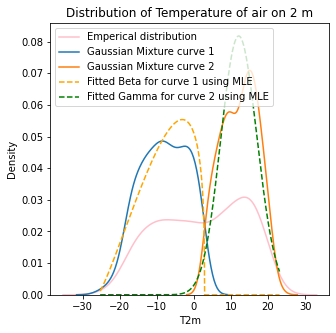

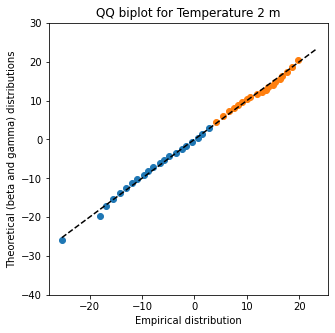

Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (0.468;0.401)
Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (0.210;0.116)


In [80]:
params_0 = scipy.stats.beta.fit(data[data.target_class_T==0].T2m)
params_1 = scipy.stats.gamma.fit(data[data.target_class_T==1].T2m)
x = np.linspace(min(data['T2m']),max(data['T2m']),len(data['T2m']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['T2m'], color = 'pink', label = 'Emperical distribution')
sns.kdeplot(data=data[data.target_class_T==0].T2m, label = 'Gaussian Mixture curve 1')
sns.kdeplot(data=data[data.target_class_T==1].T2m, label = 'Gaussian Mixture curve 2')
plt.plot(x,scipy.stats.beta.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted Beta for curve 1 using MLE')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma for curve 2 using MLE')
plt.xlabel("T2m")
plt.title("Distribution of Temperature of air on 2 m")
plt.legend(loc="upper left")
plt.show()
f.savefig('./plot6.png')

params1 = scipy.stats.beta.fit(data[data.target_class_T==0].T2m)
params2 = scipy.stats.gamma.fit(data[data.target_class_T==1].T2m)
percs = np.linspace(0, 100, 21)
qn1 = np.percentile(data[data.target_class_T==0].T2m, percs)
qn2 = np.percentile(data[data.target_class_T==1].T2m, percs)
qnt_1 = scipy.stats.beta.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['T2m']), np.max(data['T2m']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn1, qnt_1, ls="", marker="o", markersize=6)
plt.plot(qn2, qnt_2, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for Temperature 2 m')
plt.ylim(-40,30)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (beta and gamma) distributions')
plt.show()
f.savefig('./plot7.png')

p1_1 = scipy.stats.kstest(data[data.target_class_T==0].T2m, 'beta', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data[data.target_class_T==0].T2m, 'beta', params1).pvalue
p2_1 = scipy.stats.kstest(data[data.target_class_T==1].T2m, 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data[data.target_class_T==1].T2m, 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (%0.3f;%0.3f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (%0.3f;%0.3f)'%(p2_1, p2_2))

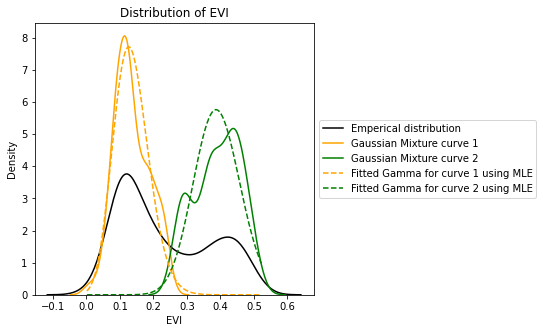

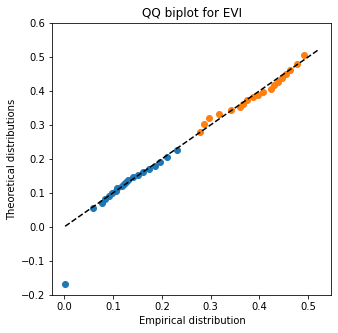

Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (0.100;0.179)
Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (0.050;0.092)


In [83]:
#EVI
params_0 = scipy.stats.gamma.fit(data[data.target_class_EVI==0].EVI)
params_1 = scipy.stats.gamma.fit(data[data.target_class_EVI==1].EVI)
x = np.linspace(min(data['EVI']),max(data['EVI']),len(data['EVI']))

f = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['EVI'], color = 'black', label = 'Emperical distribution')
sns.kdeplot(data=data[data.target_class_EVI==0].EVI, color = 'orange', label = 'Gaussian Mixture curve 1')
sns.kdeplot(data=data[data.target_class_EVI==1].EVI, color = 'green',label = 'Gaussian Mixture curve 2')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted Gamma for curve 1 using MLE')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma for curve 2 using MLE')
plt.xlabel("EVI")
plt.title("Distribution of EVI")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
f.savefig('./plot8.png')

params1 = scipy.stats.gamma.fit(data[data.target_class_EVI==0].EVI)
params2 = scipy.stats.gamma.fit(data[data.target_class_EVI==1].EVI)
percs = np.linspace(0, 100, 21)
qn1 = np.percentile(data[data.target_class_EVI==0].EVI, percs)
qn2 = np.percentile(data[data.target_class_EVI==1].EVI, percs)
qnt_1 = scipy.stats.gamma.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['EVI']), np.max(data['EVI']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn1, qnt_1, ls="", marker="o", markersize=6)
plt.plot(qn2, qnt_2, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for EVI')
plt.ylim(-0.2,0.6)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical distributions')
plt.show()
f.savefig('./plot9.png')

p1_1 = scipy.stats.kstest(data[data.target_class_EVI==0].EVI, 'gamma', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data[data.target_class_EVI==0].EVI, 'gamma', params1).pvalue
p2_1 = scipy.stats.kstest(data[data.target_class_EVI==1].EVI, 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data[data.target_class_EVI==1].EVI, 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (%0.3f;%0.3f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (%0.3f;%0.3f)'%(p2_1, p2_2))

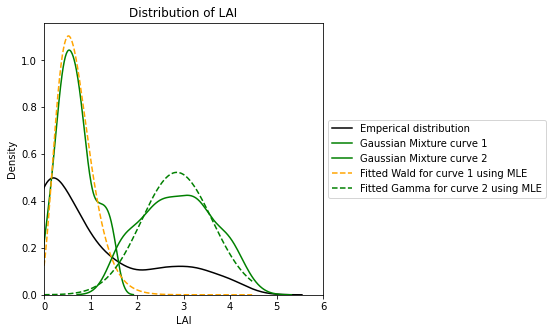

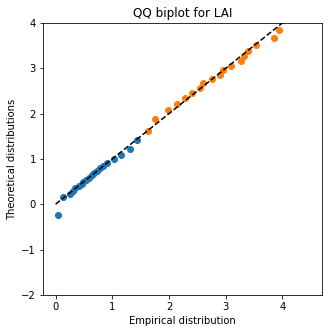

Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (0.758;0.918)
Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (0.571;0.549)


In [84]:
#LAI
params_0 = scipy.stats.gamma.fit(data[data.target_class_LAI==1].LAI)
params_1 = scipy.stats.gamma.fit(data[data.target_class_LAI==2].LAI)
x = np.linspace(min(data['LAI']),max(data['LAI']),len(data['LAI']))

fig = plt.figure(figsize=(5, 5))
sns.kdeplot(data = data['LAI'], color = 'black', label = 'Emperical distribution')
sns.kdeplot(data=data[data.target_class_LAI==1].LAI, color = 'green',label = 'Gaussian Mixture curve 1')
sns.kdeplot(data=data[data.target_class_LAI==2].LAI, color = 'green',label = 'Gaussian Mixture curve 2')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_0), color = 'orange', linestyle ='--', label='Fitted Wald for curve 1 using MLE')
plt.plot(x,scipy.stats.gamma.pdf(x,*params_1), color = 'green', linestyle ='--', label='Fitted Gamma for curve 2 using MLE')
plt.xlim(0,6)
plt.xlabel("LAI")
plt.title("Distribution of LAI")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
f.savefig('./plot10.png')

params1 = scipy.stats.gamma.fit(data[data.target_class_LAI==1].LAI)
params2 = scipy.stats.gamma.fit(data[data.target_class_LAI==2].LAI)
percs = np.linspace(0, 100, 21)
qn1 = np.percentile(data[data.target_class_LAI==1].LAI, percs)
qn2 = np.percentile(data[data.target_class_LAI==2].LAI, percs)
qnt_1 = scipy.stats.gamma.ppf(percs / 100.0, *params1)
qnt_2= scipy.stats.gamma.ppf(percs / 100.0, *params2)
x = np.linspace(np.min(data['LAI']), np.max(data['LAI']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn1, qnt_1, ls="", marker="o", markersize=6)
plt.plot(qn2, qnt_2, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for LAI')
plt.ylim(-2,4)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical distributions')
plt.show()
f.savefig('./plot11.png')

p1_1 = scipy.stats.kstest(data[data.target_class_LAI==1].LAI, 'gamma', params1).pvalue
p1_2 = scipy.stats.cramervonmises(data[data.target_class_LAI==1].LAI, 'gamma', params1).pvalue
p2_1 = scipy.stats.kstest(data[data.target_class_LAI==2].LAI, 'gamma', params2).pvalue
p2_2 = scipy.stats.cramervonmises(data[data.target_class_LAI==2].LAI, 'gamma', params2).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 1): (%0.3f;%0.3f)'%(p1_1, p1_2))
print(f'Results of Kolmogorov and CramerVonMises tests for Temperature 2 m (curve 2): (%0.3f;%0.3f)'%(p2_1, p2_2))

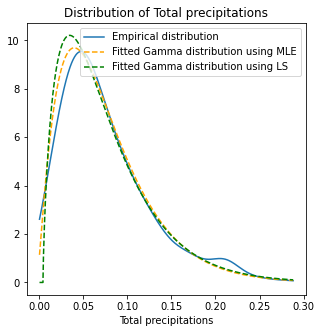

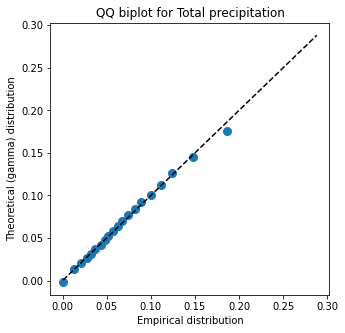

Results of Kolmogorov and CramerVonMises tests for Total precipitation: (0.957;0.848)


In [85]:
def loss_for_LS_gamma_TP(params):
    x = np.linspace(0.01, 0.95)
    quant = np.quantile(data['Total prec'], x)
    quantiles_approx = scipy.stats.gamma.ppf(x, *params)
    return quant - quantiles_approx

params_MLE = scipy.stats.gamma.fit(data['Total prec'])
params_LS = scipy.optimize.least_squares(loss_for_LS_gamma_TP, (1.0, 1.0, 1.0)).x
x = np.linspace(min(data['Total prec']), max(data['Total prec']), len(data))

fig = plt.figure(figsize=(5, 5))
plt.plot(KDE(data['Total prec'])[0],KDE(data['Total prec'])[1], label='Empirical distribution')
plt.plot(x, scipy.stats.gamma.pdf(x, *params_MLE), color = 'orange', linestyle ='--', label='Fitted Gamma distribution using MLE')
plt.plot(x, scipy.stats.gamma.pdf(x, *params_LS), color = 'green', linestyle ='--', label='Fitted Gamma distribution using LS')
plt.xlabel("Total precipitations")
plt.title("Distribution of Total precipitations")
plt.legend(loc="upper right")
plt.legend()
plt.show()
f.savefig('./plot12.png')

params = scipy.stats.gamma.fit(data['Total prec'])
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(data['Total prec'], percs)
qn_second= scipy.stats.gamma.ppf(percs / 100.0, *params)
x = np.linspace(np.min(data['Total prec']), np.max(data['Total prec']))

f = plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_second, ls="", marker="o", markersize=8)
plt.plot(x, x, color="k", ls="--")
plt.title('QQ biplot for Total precipitation')
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (gamma) distribution')
plt.show()
f.savefig('./plot13.png')

params = scipy.stats.gamma.fit(data['Total prec'])
p1 = scipy.stats.kstest(data['Total prec'], 'gamma', params).pvalue
p2 = scipy.stats.cramervonmises(data['Total prec'], 'gamma', params).pvalue
print(f'Results of Kolmogorov and CramerVonMises tests for Total precipitation: (%0.3f;%0.3f)'%(p1, p2))